## Aplicación de la estadística descriptica en la ingeniería de confiabilidad.

### Ejercicio práctico de aplicación de la estadística descriptica en la ingeniería de confiabilidad por medio del uso de Python y sus librerías.

Para facilitar el aprendizaje de la teoría aquí planteada realizaremos un ejercicio con datos reales de parámetros que caracterizan los yacimientos de crudo. Esta data se utilizará a lo largo de las diferentes etapas de desarrollo de los ejercicios prácticos.

***Ejercicio 1 - Distribuciones de Probabilidad***

Para mostrar la aplicabilidad de Python en la estadística descriptiva, analizaremos los resultados de porosidad y niveles de arenas de 99 yacimientos reales con el fin de realizar un análisis completo de la información suministrada.

In [1]:
# Importamos las librerías necesarias para el trabajo con los datos
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math as mth

In [2]:
# Importamos los datos del yacimiento

DATA = pd.read_csv("EJERCICIO 1.csv")
DATA.head(10)

,POROSIDAD,ARENA
0,0.2370,130.293
1,0.2266,37.000
2,0.2179,41.037
3,0.2240,52.500
4,0.2319,86.092
5,0.2400,43.223
6,0.2413,56.500
7,0.2436,24.035
8,0.2331,35.963
9,0.2376,35.864


In [3]:
#Aislamos la data en una variable porosidad y una para arena definimos el total de elementos de la serie
porosidad = DATA["POROSIDAD"]
arena = DATA["ARENA"]

**1. Histograma de frecuencia**

El histograma de frecuencias nos permite contestar preguntas como:

¿Cuál es la probabilidad de que X tome un determinado valor xi?
¿Cuál es el valor o el rango de valores de X con mayor probabilidad de ocurrencia?
¿De qué manera se distribuyen los probables valores de X?

In [4]:
"""Primeramente calcularemos el parametro de clases para comparar con el resultado al construir el histrograma con los 
parametros por defecto"""

# Contamos la cantidad de elementos de los datos de porosidad
cant_elemt = porosidad.count()
k = round(mth.sqrt(cant_elemt))
print("El numero correcto de clases es: " + str(k))

El numero correcto de clases es: 10


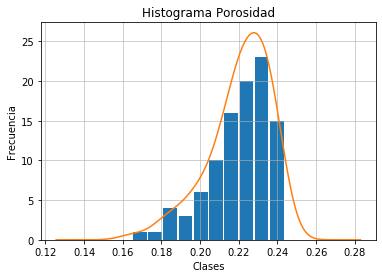

In [5]:
# Llamamos la funcion hist de la biblioteca matplotlib.pyplot que importamos al inicio

# bins = auto para dejar que la libreria haga el calculo del numero de clases y podamos comparlo
# rwidth = 0.9 para que las barras del grafico queden separadas una de la otra
plt.hist(porosidad, bins="auto" , rwidth=0.9)
# plot.kde - kernel density equivalent realiza una grafica ajustada al comportamiento de los datos, por el momento no 
# profundizaremos en este tema
porosidad.plot.kde(bw_method='silverman')
plt.title("Histograma Porosidad")
plt.xlabel('Clases')
plt.ylabel('Frecuencia')
# el parametro de aplpha = 0.75 se pone para visualizar una rejilla en la grafica
plt.grid(alpha=0.75)

**Histograma inicial**

Como podemos observar el histograma por sí solo no nos proporciona mayor información respecto a la distribución de los datos. La aplicación de esta librería retorna una información que podremos utilizar para el análisis de la información, pero debe ser extraída y manipulada manualmente. Pueden encontrar mayor información sobre la librería en la siguiente dirección: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html#matplotlib.pyplot.hist

Para facilitar el análisis procederemos a crear una función que construya la misma grafica pero que exporte la información en forma de tabla con el fin de realizar el análisis de la distribución de los datos.


In [6]:
# A continuacion se define una funcion para construir el histrograma de frecuencia, con el objetivo de exporta una tabla de 
# resultados para su posterior analisis. 

def histo_frec(data, nombre):
    #Definimos variables globales, esta variable sera el dataframe que contendra la tabla de resultados del histrograma
    global matrix_frame_frec
    # Definimos la cantidad de elementos
    cant_elemt = data.count()
    # Definimos el numero de clases
    k = round(mth.sqrt(cant_elemt))
       
    # Definimos parametros basicos del histograma, tanto por puntos como por densidad de poblacion
    n, bins = np.histogram(data, bins=k)
    m, bins2 = np.histogram(data, bins=k, density=True)
    
    # Creamos variable para almacenar las clases
    clases=[]
    # Creamos variable para almacenar la tabla de resultados
    matrix =[]
    #Calculamos la probabilida de ocurrencia de los eventos
    prob =n/cant_elemt
    # Construimos el array de clases
    for i in range(0,k):
        par_val=(round(bins[i],4),round(bins[i+1],4))
        clases.append(par_val)
    # Construmios la tabla de datos almacenandola en la matrix
    for i in range(0,k):
        diccionario ={"Clases":clases[i],"# Puntos":n[i],"Probabilidad":round(prob[i],4), "Densidad":m[i]}
        matrix.append(diccionario)
    matrix_frame_frec = pd.DataFrame(matrix)
    
    #Construimos el histograma
    plt.hist(data, bins=k , density = True, rwidth=0.9)
    data.plot.kde(bw_method='silverman')
    plt.title(nombre)
    plt.xlabel('Clases')
    plt.ylabel('Frecuencia')
    plt.grid(alpha=0.75)
    
    
    return plt.show(), matrix_frame_frec

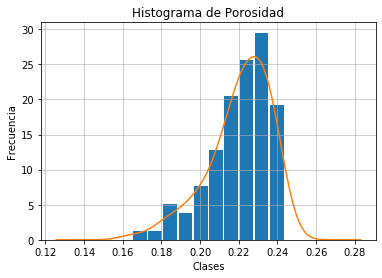

(None,
              Clases  # Puntos  Probabilidad   Densidad
 0  (0.1649, 0.1728)         1        0.0101   1.283483
 1  (0.1728, 0.1806)         1        0.0101   1.283483
 2  (0.1806, 0.1885)         4        0.0404   5.133931
 3  (0.1885, 0.1964)         3        0.0303   3.850449
 4  (0.1964, 0.2042)         6        0.0606   7.700897
 5  (0.2042, 0.2121)        10        0.1010  12.834829
 6    (0.2121, 0.22)        16        0.1616  20.535726
 7    (0.22, 0.2279)        20        0.2020  25.669657
 8  (0.2279, 0.2357)        23        0.2323  29.520106
 9  (0.2357, 0.2436)        15        0.1515  19.252243)

In [7]:
# Ejecutamos la funcion histo_frec y le pasamos la data porosidad y el nombre que le pondremos a la grafica.
histo_frec(porosidad, "Histograma de Porosidad")

***Analisis del histrograma de frecuencias***

Del histograma de frecuencias construido para la variable aleatoria “Porosidad” podemos inferir lo siguiente:

1. p(Poro = 0.21 micras ) = 12 %  (probabilidad de que la porosidad tome el valor de 0,21 micras )
2. p(Poro = 0.21 micras ) = 16 % (probabilidad de que la porosidad tome el valor de 0,22 micras
3. p(0.2279 ≤ P < 0.2357  micras) = 29.5% (probabilidad de que la porosidad tome valores mayores o iguales a 0.2279 micras y menores de 0.2357 micras )
4. El 43% de probabilidad de ocurrencia está ubicado en el rango que va desde 0.22 hasta 0.2357 micras

**2. Histograma de frecuencia acumulado**


En ocasiones estamos interesados en contestar preguntas como:

¿Cuál es la probabilidad de que X tome un valor menor o igual a determinado valor?

Para contestar esta pregunta es conveniente organizar gráficamente la información en la forma de un Histograma Acumulado Directo. De igual manera para facilitar el análisis de la información crearemos una función que grafique el histograma acumulado y nos entregue la información en forma de tabla para su posterior análisis. 

In [8]:
# A continuacion se define una funcion para construir el histrograma acumulado, con el objetivo de exporta una tabla de 
# resultados para su posterior analisis. 

def histo_cum(data, nombre):
    #Definimos variables globales, esta variable sera el dataframe que contendra la tabla de resultados del histrograma
    global hmatrix_frame_cum
    # Definimos la cantidad de elementos
    cant_elemt = data.count()
    # Definimos el numero de clases
    k = round(mth.sqrt(cant_elemt))
    # Definimos parametros basicos del histograma, tanto por puntos como por densidad de poblacion
    n, bins = np.histogram(data, bins=k)
    a =plt.hist(data, bins="auto" , density = True, cumulative= True, rwidth=0.9)
    cum =a[0]
    # Creamos variable para almacenar las clases
    clases=[]
    # Creamos variable para almacenar la tabla de resultados
    matrix =[]
    # Construimos el array de clases
    for i in range(0,k):
        par_val=(round(bins[i],4),round(bins[i+1],4))
        clases.append(par_val)
    for i in range(0,k):
        diccionario ={"Clases":clases[i],"# Puntos":n[i],"Probabilidad":cum[i]}
        matrix.append(diccionario)
    matrix_frame_cum = pd.DataFrame(matrix)
   
    #Construimos el histograma
    plt.title(nombre)
    plt.xlabel('Clases')
    plt.ylabel('Frecuencia')
    plt.grid(alpha=0.75)

    return plt.show(), matrix_frame_cum

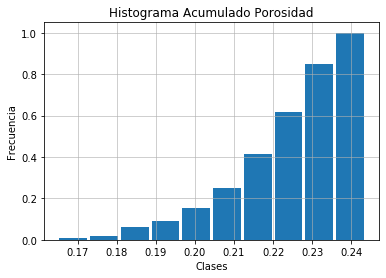

(None,
              Clases  # Puntos  Probabilidad
 0  (0.1649, 0.1728)         1      0.010101
 1  (0.1728, 0.1806)         1      0.020202
 2  (0.1806, 0.1885)         4      0.060606
 3  (0.1885, 0.1964)         3      0.090909
 4  (0.1964, 0.2042)         6      0.151515
 5  (0.2042, 0.2121)        10      0.252525
 6    (0.2121, 0.22)        16      0.414141
 7    (0.22, 0.2279)        20      0.616162
 8  (0.2279, 0.2357)        23      0.848485
 9  (0.2357, 0.2436)        15      1.000000)

In [9]:
histo_cum(porosidad,"Histograma Acumulado Porosidad")

Del Histograma Acumulado Directo construido para la variable aleatoria “Porosidad” podemos inferir entre otras cosas, lo siguiente:

1.	p(P ≤ 0.2436 micras ) = 100% (probabilidad de que porosidad tome valores menores o iguales de 0.2436 micras es de 100%)
2.	p(P ≤ 0.2279 micras ) = 84.84% (probabilidad de que la porosidad tome valores menores o iguales de 0.2279 micras es de 85%)
3.	p(P> 0.2279 micras)= 1-0.8484 =0.1516 =15.16% (probabilidad de que la porosidad tome valores mayores a 0.2279 micras es de 15.16%)


**3. Medidas de Posición o Tendencia Central (Media, Mediana y Moda)**

Una distribución se caracteriza, en general, por medio de tres criterios:

1. El valor central o medida de posición (la media, la mediana o la moda).
2. Una cantidad que expresa el grado de dispersión (la desviación estándar).
3. La forma de la curva, es decir, la forma general de la distribución probabilística.


**3.1 Media**

La media o valor esperado es una idea fundamental en el estudio de las distribuciones de probabilidad que expresa básicamente la tendencia central o posición de la distribución. Como se muestra en la figura anterior, la media no es necesariamente el valor de mayor probabilidad de ocurrencia (como suele interpretarse de manera errónea); la media es “el centro de gravedad” de una distribución. Adicional a “esperanza matemática” o “valor esperado”, otros nombres comúnmente usados para referirse a la media son “average”, “promedio” y “centro de gravedad”.

In [10]:
# Procedemos a calcular la media de la "Porosidad"
media_poro= porosidad.mean()
media_poro

0.22047878787878786

El valor promedio obtenido de porosida se ubica en el intervalo No 7 donde la probabilidad de ocurrencia es del 20%. Sin embargo los valores de mayor probabilidad se encuentran en el intervalo No 8 donde la probabilidad de ocurrencia es un poco mayor. 

**2.2.2 Mediana**

La Mediana, es otra de las medidas o valores indicativos de la tendencia central de una distribución. Formalmente se define a la “Mediana” como el valor “x50%” que tiene una probabilidad acumulada de 50%; en otras palabras, la mediana es un valor de la variable aleatoria tal que el 50% de los probables valores de “X” serán menores o iguales de dicho valor y el otro 50% serán mayores.

La principal diferencia entre el comportamiento de la media y la mediana está relacionada con los valores atípicos o extremos del conjunto de datos. La media se ve muy afectada por los valores atípicos, pero la mediana solo depende de los valores atípicos, ya sea ligeramente o nada. 

In [11]:
# Procedemos a calculas la mediana de la "Porosidad"
median_poro= porosidad.median()
median_poro

0.2238

El valor de la mediana es de 0.2238, siendo levemente mayor al promedio obtenido anteriormente de 0.2204 ubicándose en el mismo grupo No 7 de datos con la misma probabilidad de ocurrencia. Una diferencia tan pequeña entre estos dos parámetros, como veremos más adelante significa que los datos tienen una varianza muy pequeña, su desviación estándar será de poca incertidumbre y el ancho de los datos pequeños por lo que se puede confiar en la veracidad de los mismos ya que todos se relacionan directamente al proceso físico que estamos analizando sin que hubieran fallas en el método de detección que pudieran alterar los datos.

**2.2.3 Moda**
La Moda, es también una medida que indica la tendencia central de una distribución. Formalmente se define como el valor xm de la variable aleatoria X, que tiene la mayor probabilidad de ocurrencia. Enla figura de introduccion del punto 2 se puede observar la representacion grafica del valor de la moda.  Si no hay un solo valor, el conjunto es multimodal ya que tiene múltiples valores modales. Por ejemplo, en el conjunto que contiene los puntos 2, 3, 2, 8 y 12, el número 2 es el modo porque ocurre dos veces, a diferencia de los otros elementos que ocurren solo una vez.

In [12]:
# Como puede ver, .mode () devuelve un nuevo pd.Series que contiene todos los valores modales.
moda_poro= porosidad.mode()
moda_poro

0    0.2198
1    0.2240
2    0.2298
3    0.2315
4    0.2319
5    0.2321
6    0.2331
dtype: float64

En cuanto a la moda, el software nos devuelve un listado de 7 diferentes puntos donde se encontraron la mayor cantidad de coincidencias. De los 7 datos, 6 se encuentran en los intervalos de mayor probabilidad de ocurrencia y al no tener un solo parametro de media nos corrobora que estamos analizando un proceso natural totalmente aleatorio, pero que nos permitira, en este caso, caracterizar la porosidad esperada del yacimiento evaluado. Como veremos mas adelante al verificar los datos completos, existe una correlacion estre la porosidad y el nivel de arena esperado que nos permitira comparar este yacimiento con muchos otros para determinar el potencial del mismo. 

**2.3 Medidas de Dispersión**

La dispersión de una distribución de probabilidad puede considerarse la característica más importante de la misma ya que en ella esta retratada la información sobre la incertidumbre de la variable random en estudio. En otras palabras, la dispersión es un indicativo de la incertidumbre relacionada con la variable; por ello, al cuantificar la dispersión estamos cuantificando el nivel de incertidumbre de la variable en análisis.

Las decisiones que se toman en relación con variables random serán más difíciles, en la medida en que las variables tengan un mayor grado de dispersión, y viceversa, serán más fáciles en la medida en que las variables sean menos dispersas.


En esta sección, aprenderá a identificar y calcular las siguientes medidas de dispercion:

* Varianza
* Desviación Estándar
* Coeficiente de Variación
* Asimetria estadistica
* Percentiles
* Rangos

**2.3.1 Varianza**

La varianza de la muestra cuantifica la propagación de los datos. Muestra numéricamente cuán lejos están los puntos de datos de la media. Puede expresar la varianza muestral del conjunto de datos 𝑥 con 𝑛 elementos matemáticamente como 𝑠² = Σᵢ (𝑥ᵢ - mean (𝑥)) ² / (𝑛 - 1), donde 𝑖 = 1, 2, ..., 𝑛 y media (𝑥) es la media muestral de 𝑥. Si desea comprender más profundamente por qué divide la suma con 𝑛 - 1 en lugar de 𝑛, puede profundizar en https://en.wikipedia.org/wiki/Bessel%27s_correction

In [13]:
"""Calcula la varianza de la población de manera similar a la varianza de la muestra. Sin embargo, debe usar 𝑛 en el denominador
en lugar de 𝑛 - 1: Σᵢ (𝑥ᵢ - mean (𝑥)) ² / 𝑛. En este caso, 𝑛 es el número de elementos en toda la población. para realizar esto
en Pandas utilizamos el parametro ddof=0"""
var_muestra = porosidad.var()
var_poblacion = porosidad.var(ddof=0)
var_muestra,var_poblacion

(0.0002606439332096475, 0.00025801116620752983)

Independiente del resultado, entre menor es el valor de la varianza, menor es la dispersión que hay entre los datos. Para el caso de estudio, el resultado indica que los datos están muy concentrados tal y como se encontró en el histograma, donde el 60% de los datos se concentra en los intervalos 6, 7, 8, lo cual a su vez permite caracterizar el yacimiento según su porosidad.

**2.3.2 Desviación Estándar**

La medida de dispersión más útil es la desviación estándar ( σ ), la cual se corresponde a la raíz cuadrada de varianza (Var(x)). 

Var(x)= σ2  

In [14]:
# Calculamos la desviación estándar
stand_dev= porosidad.std()
stand_dev

0.016144470669850017

Al igual que con la varianza, entre menor sea el resulado menor la dispersion de los datos. Considere +-10% del valor de la mediana encontrada con anterioridad, que nos daria el intervalo de 0.2014 - 0,2462 micras. Sumando el resultado de la desviacion estandar a la mediana encontramos un valor de 0,2398 micras lo cual nos indica que el valor de la desviacion estandar del set de datos analizados, en general,  es levemente menor al 10%. 

**2.3.3 Coeficiente de Variación**

El Coeficiente de Variación, es una medida de dispersión alternativa, de uso común, que se define como un cociente donde el numerador es la desviación estándar y el denominador es la media. Éste es una medida de dispersión de la distribución relativa a la media.

Coeficiente de Variación(x)=  ρx = μ/ σ

In [15]:
# Calculamos el coeficiente de variación 
coef_var= stand_dev/media_poro *100
coef_var

7.322459827167467

Al igual que la desviación estándar el coeficiente de variación indica un % de variabilidad entre los datos. Para el caso en particular la variación entre los datos es del 7.32%; al compararlo con la desviación estándar obtenemos que son datos muy similares, por ende, es una medida para corroborar la desviación estándar. El cálculo de este parámetro no está incluido en ninguna de las librerías de Python, no obstante al ser tan sencillo de calcular se hace de manera manual. 

**2.3.4 Asimetría estadistica**

La asimetría estadistica de la muestra mide la asimetría con relacion a un punto cero de una muestra de datos. El valor de la asimetria es positivo o negativo, dependiendo de a donde se inclinen los datos respecto al punto cero o la mediana.

Hay varias definiciones matemáticas de asimetría. Una expresión común para calcular la asimetría del conjunto de datos 𝑥 con 𝑛 elementos es (𝑛² / ((𝑛 - 1) (𝑛 - 2))) (Σᵢ (𝑥ᵢ - mean (𝑥)) ³ / (𝑛𝑠³)). 

Una expresión más simple es Σᵢ (𝑥ᵢ - media (𝑥)) ³ 𝑛 / ((𝑛 - 1) (𝑛 - 2) 𝑠³), donde 𝑖 = 1, 2, ..., 𝑛 y media (𝑥) es la media muestral de 𝑥. La asimetría definida de esta manera se denomina al coeficiente de momento estandarizado de Fisher-Pearson ajustado.

In [16]:
# Calculamos la asimetría de la distribución
skew = porosidad.skew()
skew

-1.0695680366384361

El resultado negativo signigica que existe una cola asimetrica en el lado izquierdo en la distribucion de los datos en relacion a la mediana encontrada. Esta cola asimetrica corresponde a los datos de las clases 0 a la 6 que dan como resultado una probabilidad de ocurrencia del 16% y como veremos mas adelante se convienrten en el % de error que podriamos esperar en los datos.

**2.3.5 Percentiles**

El 𝑝 percentil de muestra es el elemento en el conjunto de datos de tal manera que 𝑝% de los elementos en el conjunto de datos son menores o iguales a ese valor. Además, (100 - 𝑝)% de los elementos son mayores o iguales a ese valor. Si hay dos de estos elementos en el conjunto de datos, entonces el percentil de la muestra es su media aritmética. Cada conjunto de datos tiene tres cuartiles, que son los percentiles que dividen el conjunto de datos en cuatro partes:

* El primer cuartil es el percentil 25 de la muestra. Divide aproximadamente el 25% de los elementos más pequeños del resto del conjunto de datos.
* El segundo cuartil es el percentil 50 de la muestra o la mediana. Aproximadamente el 25% de los datoss se encuentran entre el primer y el segundo cuartil y otro 25% entre el segundo y el tercer cuartil.
* El tercer cuartil es el percentil 75 de la muestra. Divide aproximadamente el 25% de los datos más grandes del resto del conjunto de datos.

A continuacion revisaremos como realizar esta funcion en Python bajo la libreria Pandas:

In [17]:
# A continuación se calculan los percentiles de la lista
list_per = [0.25, 0.5, 0.75]
percentil = porosidad.quantile(list_per)
percentil

0.25    0.21205
0.50    0.22380
0.75    0.23200
Name: POROSIDAD, dtype: float64

**2.3.6 Intervalo de Confianza**

Cuando se hacen estimaciones o pronósticos de variables random, esta estimación básicamente consiste en ***determinar la distribución de probabilidades*** que representa a la variable de interés. En estos casos, nuestra estimación no debe expresarse como un solo valor estimado (para lo cual normalmente se utiliza el valor más probable o la media “ μ ” de la distribución); sino también la precisión de esa estimación.

Una forma conveniente de expresar la precisión consiste en especificar unos límites que, con una probabilidad dada, incluyan el valor verdadero de la variable. Dichos límites se denominan "límites de confianza", es decir, son límites que abarcan un intervalo dentro del cual podemos decir que se encuentra el valor verdadero con un cierto “grado de confianza”. Cuanto más distantes estén los límites entre sí, tanto mayor será la probabilidad de que incluyan el valor verdadero, pero más amplio será el rango de variación. El intervalo comprendido entre ambos límites se denomina intervalo de confianza.

Existen tres formas típicas para expresar una estimación sobre una variable random o aleatoria:
1. La Distribución Probabilística Completa.
2. Un rango de variación de la variable con su grado de certeza.
Ejemplo: “X” varia entre “xa” y “xb” con (α=100) % de certeza).
3.	Un estimado puntual (la media o la moda de la distribución).
Ejemplo X=μ

Las formas “1” y “2” ofrecen información más fidedigna de la realidad.

En el momento no contamos con la distribución probabilística que se ajuste a nuestros datos, este análisis se realizara en la segunda etapa de análisis de los datos. Sin embargo, podemos realizar una deducción de un rango de variación a partir del histograma de frecuencias analizado al comienzo de este ejercicio para su análisis.

In [18]:
# Se muestra la tabla de frecuencias de la función Histograma

matrix_frame_frec

,Clases,# Puntos,Probabilidad,Densidad
0,"(0.1649, 0.1728)",1,0.0101,1.283483
1,"(0.1728, 0.1806)",1,0.0101,1.283483
2,"(0.1806, 0.1885)",4,0.0404,5.133931
3,"(0.1885, 0.1964)",3,0.0303,3.850449
4,"(0.1964, 0.2042)",6,0.0606,7.700897
5,"(0.2042, 0.2121)",10,0.1010,12.834829
6,"(0.2121, 0.22)",16,0.1616,20.535726
7,"(0.22, 0.2279)",20,0.2020,25.669657
8,"(0.2279, 0.2357)",23,0.2323,29.520106
9,"(0.2357, 0.2436)",15,0.1515,19.252243


Para el presente set de datos podemos deducir que:

**El valor esperado X variará entre 0.2042 - 0.2436 micras con un nivel de confianza del 84% y un respectivo marjen de error del 16%.**

Aunque no es un dato muy acertado, esta evaluacion se ajusta a la distribucion de los datos en el histograma; para dar un dato mas preciso necesitamos hallar el modelo de distribucion que se ajusta a los datos, lo cual realizaremos en una segunda fase de aprendisaje. 

**3. Resumen de estadísticas descriptivas**

A lo largo del presente articulo hemos visto como calcular individualmente los parametros estadisticos mas comunes al analizar un set de datos, sin embargo las librerias como Pandas y SciPy ofrecen rutinas útiles para obtener rápidamente estadísticas descriptivas con una sola función o llamada de método de la siguinte manera:

In [19]:
# Llamamos la función describe para la variable porosidad
porosidad.describe()

count    99.000000
mean      0.220479
std       0.016144
min       0.164900
25%       0.212050
50%       0.223800
75%       0.232000
max       0.243600
Name: POROSIDAD, dtype: float64

**4. Literatura utilizada**

Para la elaboración del presente documento se utilizaron muchas fuentes bibliográficas pero en especial las siguientes:

Libros:
 * Confiabilidad Integral, un enfoque práctico, R2M S.A
 
 Artículos:
 * Python Statistics Fundamentals: How to Describe Your Data - https://realpython.com/python-statistics/
 
 Documentación:
 * Toda la documentación de las librerías de SciPy - https://www.scipy.org/docs.html


_Realizó:_

_Javier A. Ochoa M.  
Ing. Mecánico especialista en gestión de mantenimiento <br />
técnicas de mantenimiento predictivo y confiabilidad integral. <br />
+57-3213192915  
ruslombia@gmail.com  
Bogotá – Colombia_  